In [1]:
import torch, torchvision

import detectron2
from detectron2.utils.logger import setup_logger

import os
import numpy as np
import cv2
import random
import glob
from PIL import Image

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [7]:
import matplotlib
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv
from tqdm import tqdm
import IPython
from tabulate import tabulate

In [2]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [40]:
base_path = "/userhome/34/h3567721/dataset/kitti/raw_data_test_ins/2011_09_26/2011_09_26_drive_0106_sync/image_02/data"

In [41]:
ins = np.load(os.path.join(base_path, "0000000015_instance_new.npy"))

<IPython.core.display.Javascript object>


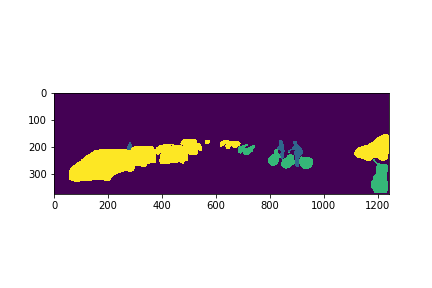

In [55]:
%matplotlib notebook 
plt.imshow(ins[:,:,0])

<IPython.core.display.Javascript object>


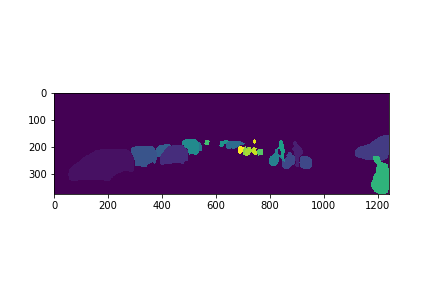

In [57]:
%matplotlib notebook 
plt.imshow(ins[:,:,1])

In [47]:
np.max(ins[:,:,1])

18

In [10]:
rgb_img = cv2.imread(os.path.join(base_path, "0000000015.png")) 

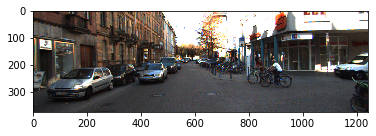

In [11]:
plt.imshow(rgb_img)

In [13]:
output = predictor(rgb_img)

In [16]:
mask = output['instances'].pred_masks.cpu().numpy().transpose([1,2,0])

In [26]:
ins_class = output['instances'].pred_classes.cpu().numpy()
ins_1_0 = np.zeros((mask.shape[0],mask.shape[1]), dtype=int)
ins_1_1 = np.zeros((mask.shape[0],mask.shape[1]), dtype=int)
        
for i, sig_class in enumerate(ins_class):
    ins_1_0[mask[:,:,i]] = sig_class+1

for i, sig_class in enumerate(ins_class):
    ins_1_1[mask[:,:,i]] = i+1

<IPython.core.display.Javascript object>


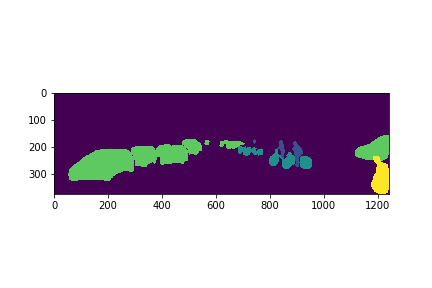

In [56]:
%matplotlib notebook 
plt.imshow(ins_1_0)

<IPython.core.display.Javascript object>


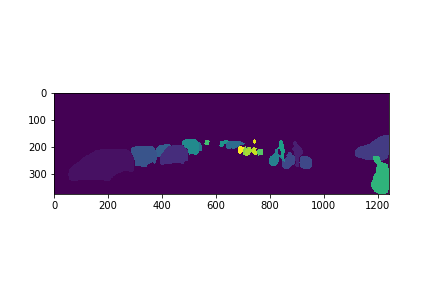

In [59]:
%matplotlib notebook 
plt.imshow(ins_1_1)

In [30]:
np.max(ins_1_1)

23